# Rating Options Survey Analysis

# Methodology

*Explain your survey methodology here.*

# Summary

*Summarize your analysis and results here.*

In [1]:
import pandas
import seaborn
import matplotlib.pyplot as plt

# Set the plot format to SVG for better quality plots
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

In [2]:
df = pandas.read_csv('rating-options-survey.csv')

In [3]:
# Set up columns, themes, colors
timestamp, option1_rating, option1_like, option1_dislike, option2_rating, option2_like, option2_dislike, option3_rating, option3_like, option3_dislike, other_comments, = df.columns

rating_cols = [option1_rating, option2_rating, option3_rating]

themes = ["option1", "option2", "option3"]
n_themes = len(themes)
theme_colors = ["blue", "red", "yellow", "green"]

n_responses = len(df)

In [4]:
## Functions to determine complimentary color
## https://stackoverflow.com/questions/40233986/python-is-there-a-function-or-formula-to-find-the-complementary-colour-of-a-rgb

# Sum of the min & max of (a, b, c)
def hilo(a, b, c):
    if c < b: b, c = c, b
    if b < a: a, b = b, a
    if c < b: b, c = c, b
    return a + c

# Get complimentary color
def complement(r, g, b):
    k = hilo(r, g, b)
    return tuple(k - u for u in (r, g, b))

## Ratings

*Customize this text: The survey asked respondents to rate the usefulness of four themes on a 1-4 scale, with 1 being Not very useful and 4 being Very useful.*

The mean and standard deviation of the rating for each option are expressed numerically and graphically as:

In [5]:
df[rating_cols].describe().transpose()[["mean","std"]].round(2)

,mean,std
How useful is option 1?,2.00,1.00
How useful is option 2?,2.67,1.53
How useful is option 3?,3.67,0.58


In [6]:
# So seaborn can automatically plot standard deviations as error bars,
# combine all ratings into one column, paired with theme
all_themes = []
for theme in themes:
    this_theme = [theme] * n_responses
    all_themes += this_theme

all_ratings = []
for col in rating_cols:
    this_theme_ratings = list(df[col])
    all_ratings += this_theme_ratings

df_combined = pandas.DataFrame(list(zip(all_themes, all_ratings)), columns = ['theme', 'rating'])


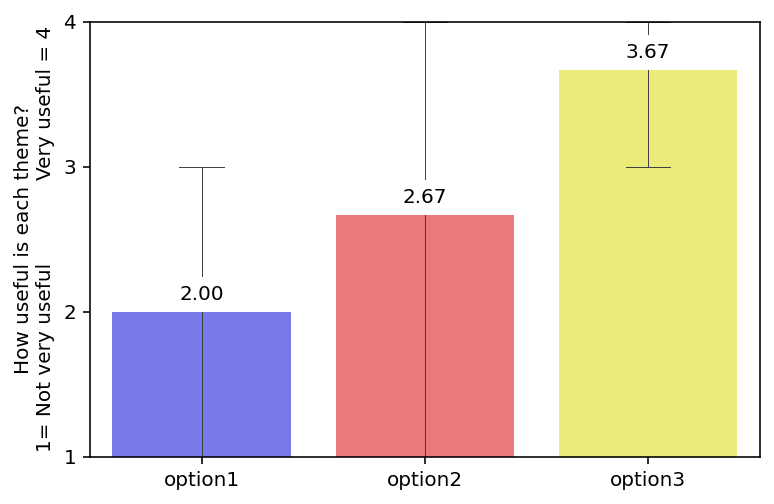

In [7]:
rating_min = 1
rating_max = 4
num_bins = rating_max - rating_min + 1
rating_values = range(rating_min, rating_max + 1)

t = seaborn.barplot(
    data=df_combined, 
    x="theme", 
    y="rating",
    capsize=0.2,
    errwidth=0.5,
    palette=theme_colors, 
    alpha=.6, 
)
t.set_yticks(rating_values)
t.bar_label(
    t.containers[0], 
    # label_type = 'center', 
    fmt='%.2f',
    padding = 4,
    bbox=dict(
        fc = "white", 
        lw = 0,
    )
)

y_label = f"How useful is each theme?\n{rating_min}"
y_label += "= Not very useful" + "             " + f"Very useful = {rating_max}"

t.set(xlabel='', ylabel=y_label)
t.set(ylim=(rating_min,rating_max))

t.grid(False)

*Summarize the rating results here.*

## Rating Distribution for Options

For each option, a histogram displays the count of responses for each rating level, from 1 to 4, and the dashed vertical line indicates the mean rating.

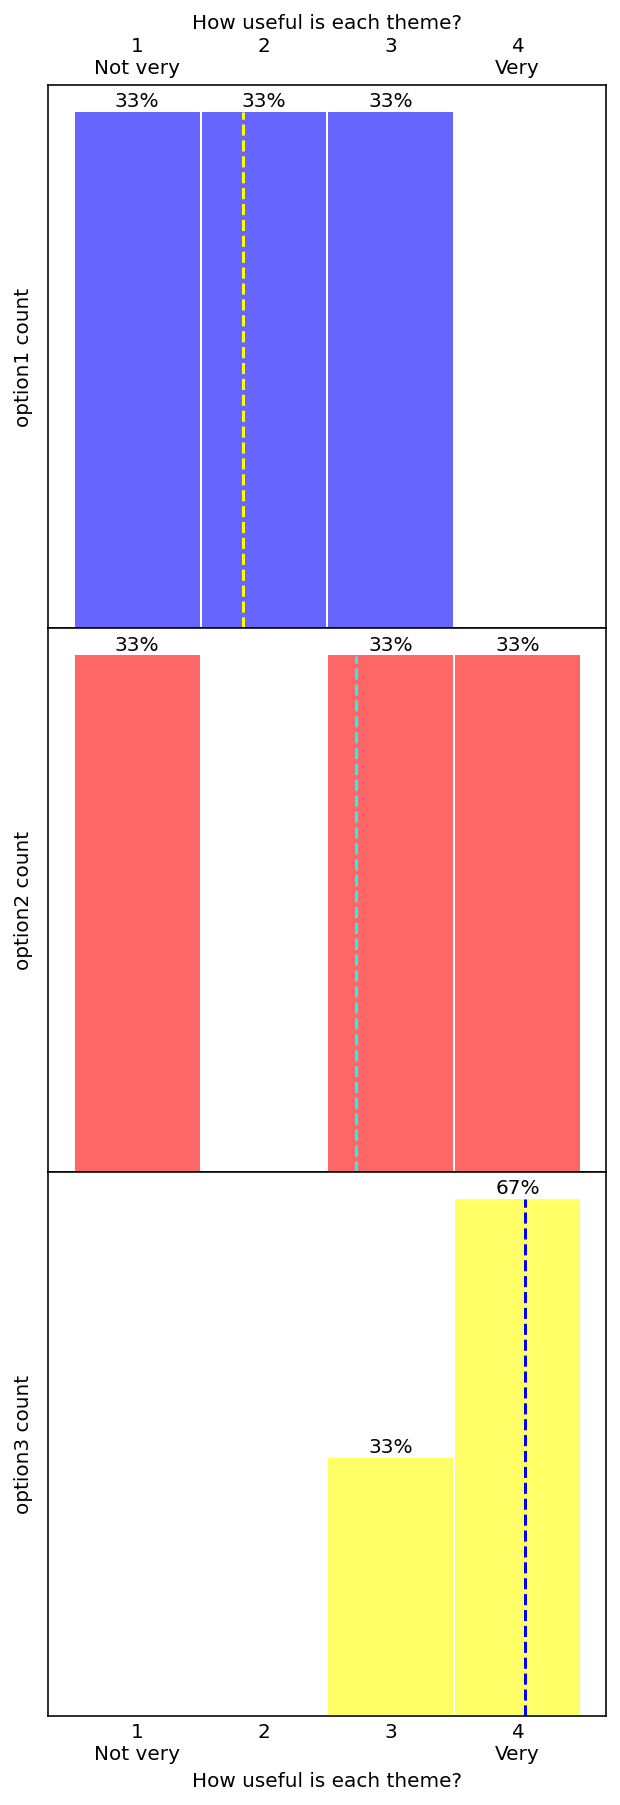

In [8]:
import matplotlib
import matplotlib.ticker as mticker

fig, axes = plt.subplots(n_themes, figsize=(5, 15))
plt.subplots_adjust(hspace = 0)

for theme_num, theme in enumerate(themes):
    graph = seaborn.histplot(
    ax=axes[theme_num],
    data=df,
    x = rating_cols[theme_num],
    bins = num_bins,
    binrange=[rating_min,rating_max],
    color=theme_colors[theme_num],
    alpha = 0.6,
    edgecolor="white"
    )
    
    ## Add vertical line at mean of each theme

    # Get RGB of bar's color
    bar_rgb = matplotlib.colors.to_rgb(theme_colors[theme_num])
    line_rgb = complement(*bar_rgb)

    #   https://datavizpyr.com/how-to-add-a-mean-median-line-to-a-seaborn-displot/
    graph.axvline(x=df[rating_cols[theme_num]].mean(),
        ls='--',
        color=line_rgb,
        ymax = 0.95
    )
    graph.set(ylabel=themes[theme_num] + " count")
    graph.grid(False)             # remove gridlines
    graph.set(yticklabels=[])     # remove y-axis tick labels

    # Add labels to bars: Percents
    theme_cats = df[rating_cols[theme_num]].dropna().astype(int).value_counts(sort=False).sort_index()

    # Ensure each bar has an entry in list
    denom = sum(theme_cats) / 100
    percents_cats = []
    for cat in range(rating_min, rating_max + 1):
        if cat in theme_cats:
            pct = theme_cats[cat] / denom
            percents_cats += ["%.0f%%" % pct]
        else:
            percents_cats += [""]

    l = graph.bar_label(
        graph.containers[0], 
        percents_cats, 
        )

    # Hide tick marks by making them zero length
    graph.tick_params(length = 0)

    if theme_num in range(1, n_themes - 2):
        # For graphs in the middle (neither top nor bottom),
        #   remove x axis and tick labels
        graph.set(xlabel='')
        graph.set_xticklabels([])
    else:
        # For graphs at top and bottom,
        #   show x-axis title and tick labels

        # Fixing yticks with matplotlib.ticker "FixedLocator"
        #   https://stackoverflow.com/questions/63723514/userwarning-fixedformatter-should-only-be-used-together-with-fixedlocator
        label_format = '{:,.0f}'
        ticks_loc = graph.get_xticks().tolist()
        graph.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
        graph.set_xticklabels([label_format.format(x) for x in ticks_loc])

        # Center labels on bars (columns)
        #   https://stackoverflow.com/questions/63516973/how-can-i-mark-xticks-at-the-center-of-bins-for-a-seaborn-distplot
        mids = [rect.get_x() + rect.get_width() / 2 for rect in graph.patches]
        graph.set_xticks(mids)

        graph.set(xlabel='How useful is each theme?')
        graph.set_xticklabels(['1\nNot very','2\n','3\n','4\nVery'])

        if theme_num == 0:
            graph.xaxis.set_ticks_position("top")
            graph.xaxis.set_label_position("top")


*Summarize the rating distribution results here.*

# Other comments from respondents

*Customize this block: Finally, notable responses to "Are there any other comments you'd like to make?" include:*

- *Notable comment 1*
- *Notable comment 2*

# Appendix: All comments from respondents

For the sake of completeness, all comments are shown below.

In [9]:
def print_answers(col):
    i = 1
    for v in df[col].iloc:
        if pandas.isna(v):
            continue
        print(f"{i}. {v.strip()}\n")
        i += 1

In [10]:
tag = "---"
for name, values in df.iteritems():
    if "like" in str(name).lower():
        print(tag + " " + name + " " + tag)
        print_answers(name)

--- What do you LIKE about option 1? ---
1. Colors

2. Nothing

3. Styling

--- What do you DISLIKE about option 1? ---
1. Navigation

2. Links, layout

3. Links

--- What do you LIKE about option 2? ---
1. Nothing

2. Links, layout

3. Clean design

--- What do you DISLIKE about option 2? ---
1. Colors, navigation

2. Navigation bar too wide

--- What do you LIKE about option 3? ---
1. Everything

2. Links

3. Navigation bar, colors

--- What do you DISLIKE about option 3? ---
1. Nothing

2. Layout

--- Are there any other comments you'd like to make? ---
1. Thanks for getting community input

